In [3]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset index
tesla_data.reset_index(inplace=True)

# Display first five rows
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Send request and parse HTML
html = requests.get(url).text
soup = BeautifulSoup(html, "html.parser")

# Find all tables
tables = soup.find_all("table")

# Initialize empty DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Loop through all tables to find the one with "Quarterly Revenue"
for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        for row in table.find_all("tr")[1:]:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue:
                    tesla_revenue = tesla_revenue.append(
                        {"Date": date, "Revenue": revenue}, ignore_index=True
                    )
        break  # Stop after finding the correct table

# Convert revenue to numeric
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")

# Display last 5 rows
print(tesla_revenue.tail())

Empty DataFrame
Columns: [Date, Revenue]
Index: []


In [9]:
# Download GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset index
gme_data.reset_index(inplace=True)

# Display first five rows
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693349  1.603295  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Send request and parse HTML
html = requests.get(url).text
soup = BeautifulSoup(html, "html.parser")

# Find all tables
tables = soup.find_all("table")

# Initialize empty DataFrame
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Loop through all tables to find the one with "Quarterly Revenue"
for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        for row in table.find_all("tr")[1:]:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue:
                    gme_revenue = gme_revenue.append(
                        {"Date": date, "Revenue": revenue}, ignore_index=True
                    )
        break  # Stop after finding the correct table

# Convert revenue to numeric
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")

# Display last 5 rows
print(gme_revenue.tail())

Empty DataFrame
Columns: [Date, Revenue]
Index: []


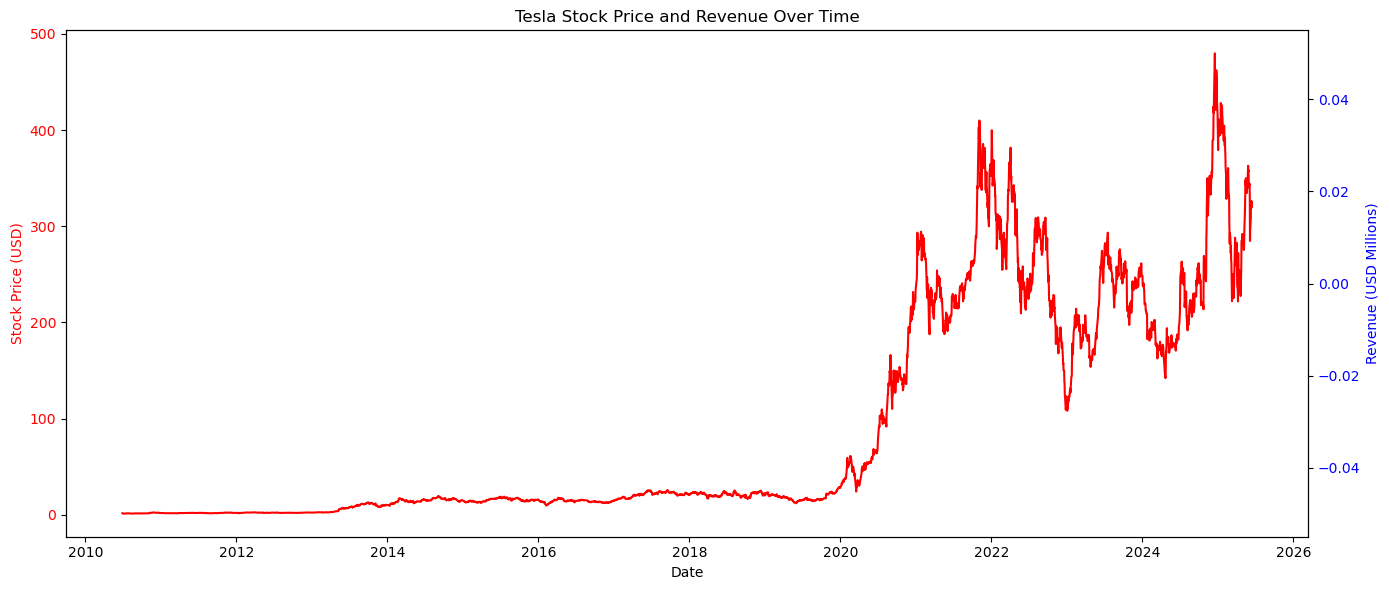

In [15]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Plot stock price
    ax1.plot(stock_data['Date'], stock_data['Close'], color='red', label='Stock Price')
    ax1.set_ylabel("Stock Price (USD)", color='red')
    ax1.set_xlabel("Date")
    ax1.tick_params(axis='y', labelcolor='red')
    ax1.set_title(f"{stock_name} Stock Price and Revenue Over Time")

    # Create a second y-axis for revenue
    ax2 = ax1.twinx()
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='blue', label='Revenue')
    ax2.set_ylabel("Revenue (USD Millions)", color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    fig.tight_layout()
    plt.show()

# Call function for Tesla
make_graph(tesla_data, tesla_revenue, "Tesla")

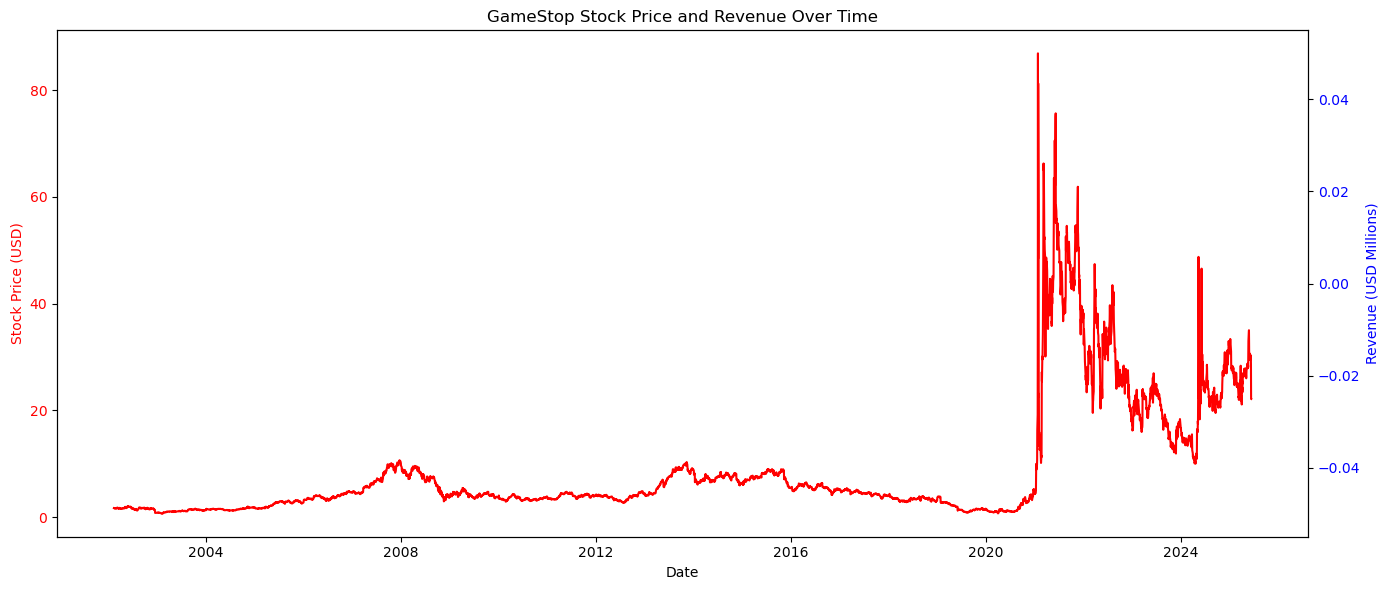

In [17]:
# Call function for GameStop
make_graph(gme_data, gme_revenue, "GameStop")